# Convolutional Neural Networks

Siyah/Beyaz resim -> 2D Array, her sütunda 0 < x < 255 arası sayı bulunur 0 siyahtır 255 beyaz.<br>
Renkli resim -> 3D Array, her sütunda aynı sayı bulunur ama 1, 2 ve 3. boyutlarda R G B renkleri temsil edilir.<br>

### Convolution

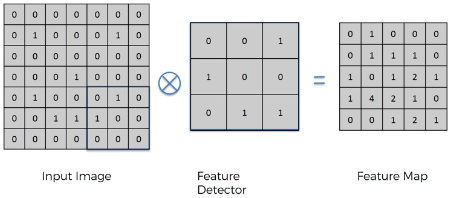<br>
Genellikle 3x3 olan bir feature detector belirlenerek resmin ilk 3x3 pixel yapısından başlayarak bütün resmi gezer ve eğer detektörde 1 sayısı olan herhangi bir sütunla resimde 1 sayısını içeren herhangi bir sütun eşleşirse, eşleşen 1 değerli sütun sayısı yeni bir matrise kaydedilir. Yani pattern arıyoruz diyebiliriz ve genellikle input image'ye Feature Map diyoruz. Bu convolution adımı resmi daha küçük hale getirmek için uygulanır çünkü işlenmesi daha kolaydır. Tabiki bu işlem resimden çıkarılabilecek özelliklerin kaybına yol açıyor ama önemli noktalarını da daha belirgin hale getiriyor. Yukarıdaki resimde görüldüğü gibi patternin en çok uyuştuğu yerde 4 sayısı var ki bu sayı orayı diğer yerlerden daha önemli hale getiriyor.<br><br>
Uygulayabileceğimiz bazı feature detectorlerden bazıları şunlardır: Sharpen(resimleri keskinleştirme), Blur(bulanıklaştırma), Edge Enchance(ana yapının etrafındaki pixelleri siler), Edge Detect(kenarları tespit etmek), Emboss(kabartma).

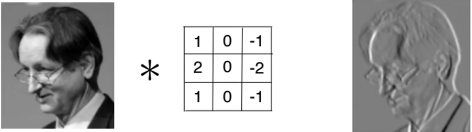

### ReLU - Rectified Linear Unit

ReLu ile resimlere filtre işlemi uygulayabiliriz. Bu işlem sayesinde resimlerden çıkarılan bilgilerin linear olmamasını sağlayabiliriz, çünkü resimdeki şeyler genellikle non-lineardır. Objeler, kenarlar, başka şeyler ama convolution, feature map, feature extraction gibi işlemler sonucu resimden yapılan çıkarımlar linear hale gelmektedir oysa aslında linear değiller. İşte bu sorunu çözmek için linear hale gelen şeylerin linearlığını ortadan kaldırmalıyız.<br>
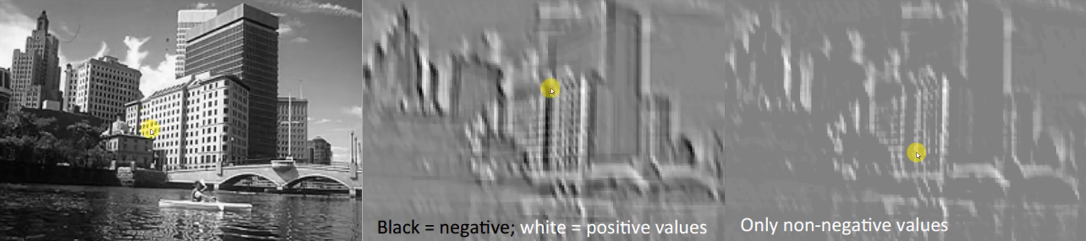<br>
Örneğin bu resimde soldaki orjinal resim ve feature mapping uygulandıktan sonra ortadaki resim oluyor. Orjinal resimde binadaki gölgeler bina için bir şey ifade etmemesine rağmen(çünkü binanın-binaların bir özelliği değil) ortadaki mapping uygulanmış siyah beyaz edilmiş resimde linearlığa sebep oluyor. Şöyle ki binanın gölge olan kısmına baktığımızda renkler güneş ışığından ötürü sağda beyazken sola doğru koyulaşıyor ve gölgede bitiyor. Bu da bir linearlık oluşturuyor.<br>
beyaz -> gri -> daha gri -> koyu -> daha koyu -> siyah<br>
demekki beyazdan sonra gri geliyorsa ve koyulaşıyorsa her zaman siyaha gider gibisinden linear bir bağlantı özelliği ortaya çıkıyor ve bu istemediğimiz bir şey, bu yüzden ReLU uygulanıyor. Uygulanmış hali de en sağdaki resim, görüldüğü üzere siyah kısımlar çıkarılınca sadece beyaz ve gri kısım kalmış ve bir yargıya varılamıyor, linear bir ilişki kurulamıyor.

### Max Pooling

Kedi resimlerini düşün, bazısı uzak çıkmış bazısı yakın, bazısı sağa bazısı sola bakıyor, bazısı değişik şekillerde ve resmin değişik yerlerinde. CNN'nin kedinin resimdeki konumuyla değil de direkt kendisiyle ve kedi özellikleriyle ilgilenmesi için Max Pooling denilen şey var.<br>
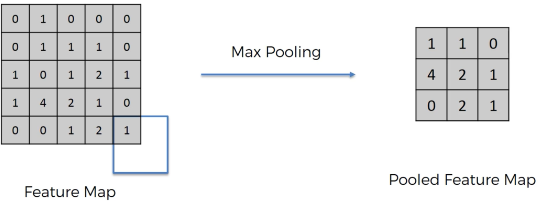<br>
Feature Map'den 2x2'li olarak pixelleri kontrol eder ve içlerindeki en yüksek değerleri alarak yeni bir matris oluşturur. Oluşan matris mapin %25i olacağından hem boyut küçültülüp hızdan kazanılır, hem %75 oranında daha düşük değerli featureler yok edildiği için overfitting olma olasılığını düşürür. Sadece en önemli özellikler hesaba katılacaktır(mapin sağ aşağısındaki gibi boşta pixel yoksa bişey değişmiyor olan pixellere bakılıyor).

### Flattening

Pooled Feature Map'ın CNN tarafından anlaşılabilecek şekle sokulması işlemidir.<br>
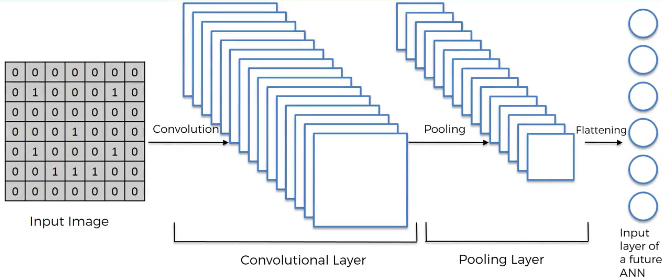<br>
Çıkarımı yapılan ve oluşturulan layerlerin bir arrey'e ardı ardına eklenmesi işlemidir. Örneğin 2x2 pixelli bir resmin pixellerini [00, 01, 10, 11] olarak bir diziye eklemek gibi düşünülebilir.

### Full Connection

Convolution -> Pooling -> Flattening yaptık sırada flattening sonucuna -> CNN bağlamak kaldı. Yani bu adımda yapay sinir ağı oluşturuluyor. Yapay sinir ağlarında bir nöronun giriş değerleri(features)lerden birini yada birkaçını yada tamamını ilişkili kabul edip ağırlıklar verip kabul ettiğini biliyoruz, CNN ağının full connected olmasının sebebi her bir nöron bir önceki katmandaki ve bir sonraki katmandaki bütün nöronlarla ilişkilidir-bağlantılıdır.  Bu nöronlara sahip saklı katmanlara işte fully connected layers deniliyor.<br>
Ağda bir tane output varsa sayısal sonuç vermesi içindir. Sınıflandırma işlemlerinde ise her bir sınıf için bir output nöronu olur. Yani burada da resim sınıflandırması yapacağımız için output layerdeki nöron sayısı sınıf sayısı kadar olacaktır. İşleyişi ve back propagation işlemi de şöyle anlatılabilir:<br>
2 tane sınıfımız var diyelim köpek ve kedi, tabi çıkış nöronları da bunlar olacaklardır output katmanında. Ağ bir iterasyon eğitilir ve köpek nöronu kendisinden önceki katmanlarda kendisine önemli bilgiler veren nöronları işaretler. Örneğin eğik kulaklar bilgisi veren nöron, büyük burun bilgisi veren nöron ve başka bilgiler veren nöronlar, bunlar işaretlenerek önemli kabul edilirler. Aynısını kedi sınıfını çıkaran nöron da yapar, köpek için önemli olan nöronları önemsiz kabul eder. Bu önemli kabul edilen nöronların bilgileri saklanır ve loss fonk sonucuna göre back propagation yapılır ve ağırlıklar güncellenir. Bu böyle devam eder ve en sonunda köpek sınıfı kendisi için en önemli bilgileri veren nöronları tamamen tespit etmiş olur ve ağırlıklarını yüksek verir, aynısını kedi sınıfı da yapar. Böylece resimdeki özellikler tespit edilmiş olurlar, büyük burun bilgisi veren nöron kesinlikle kedi sonucu vermeyecektir ve bu kedi için düşük ağırlığa sahip önemsiz nöron iken köpek için büyük ağırlığa sahip nörondur. Bu nöronlardan gelen bilgilere göre de test verisinin her bir sınıf için olasılığı hesaplanır. Ortak özelliklere sahip nöronlar da tabiki iki sınıfça da düşük ağırlıklandırılır ama çok da küçük değil tabiki, örneğin büyük burun özelliğini gösteren nöron kedi için 0.1 değerini alırken köpek için 0.9 değerini alır. Tüylü olma özelliğini gösteren nöron da kedi tarafından 0.3 diye ağırlıklandırılırken köpekçe de 0.3 olarak ağırlıklandırılabilir. Tabi bir sürü eğitim verisi ve bir sürü iterasyon sonucunda sınıflarca düşük ağırlık verine nöronlar önemsiz özellikleri belirttikleri gerekçesiyle silinip yerlerine geçerli olan özelliklere sahip nöronlar eklenir, yani aslında silme ekleme işlemi olmaz da güncellenir diyelim.<br>
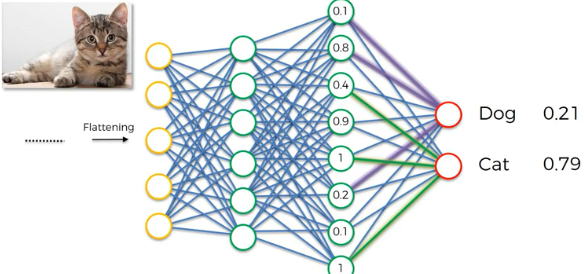

### Softmax & Cross-Entropy

Yukarıdaki resimde köpeğin 0.21, kedinin 0.79 ihtimalinde olduğunu görüyoruz. Yapay sinir ağlarının yapıları gereği kedi ve köpek nöronu birbirlerinin olasılıklarını bilmiyorlar, e o zaman nasıl oluyor da ikisinin toplamı 1 ediyor, yani nasıl oluyor da ikisi de birbirini %100e tamamlayan değerler veriyorlar? İşte bunu Softmax fonksiyonu sağlıyor, bu yüzden ağı kurduğumuz zaman bu fonksiyonu da ağa dahil etmeliyiz ki böyle dengeli değerler üretsin, 0-1 arasına çıktıları normalize etsin. Bu softmax, bazen Cross-Entropy fonksiyonu olarak geçiyor.<br>
Aynı zamanda Cross-Entropy loss fonksiyon olarak da kullanılabiliyor. Sınıflandırma işlemlerinde genellikle ağın en iyi düzeye en hızlı şekilde gelmesini sağlayan loss fonksiyonudur. Linear regresyon tarzı işlemlerde ise mean squared error tercih edilmelidir.